In [1]:
#Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
# Import of keras model and hidden layers for our convolutional network
from keras import Sequential
from keras.layers import InputLayer
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from google.colab.patches import cv2_imshow

Using TensorFlow backend.


In [3]:
#DOWNLOADING KAGGLE DATASET INTO COLAB
from google.colab import files
files.upload()

#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d gti-upm/leapgestrecog

Saving kaggle.json to kaggle (1).json
100% 2.12G/2.13G [00:27<00:00, 102MB/s] 
100% 2.13G/2.13G [00:27<00:00, 82.1MB/s]


In [7]:
from zipfile import ZipFile
file_name="leapgestrecog.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
print("done")

done


In [9]:
#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk('/content/leapgestrecog/leapGestRecog'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if path.endswith("png"):
            imagepaths.append(path)
print(len(imagepaths))

20000


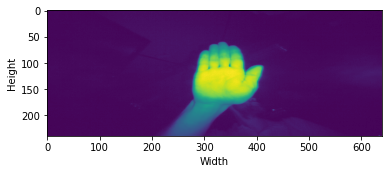

In [10]:
def img_plot(path):
  img=cv2.imread(path)
  #convert to RGB space
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  plt.imshow(img_rgb)
  plt.xlabel("Width")
  plt.ylabel("Height")

img_plot(imagepaths[509])

#MODEL-1#


In [35]:
#### Creating Training Set and Labels ####
# X for image data
X = []
# y for the labels
y = []


#Load the images into X by doing the necessary conversions and resizing of images
#Resizing is done to reduce the size of image to increase the speed of training
for i in range(len(imagepaths)):
    path=imagepaths[i]
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img = cv2.resize(img, (128,128))
    X.append(img)  
    #Getting the labels from the image path
    y_lab=int(imagepaths[i][40:42])
    y.append(y_lab)

for i in range(len(imagepaths)):
  if y[i]==10:
    y[i]=0
#Turning X & y into numpy arrays
X = np.array(X)
X = X.reshape(len(X), 128,128,1)
y = np.array(y)

print(X.shape)
print(y.shape)


(20000, 128, 128, 1)
(20000,)


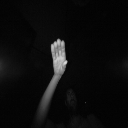

--------------------------------- 0 




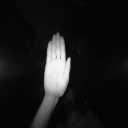

--------------------------------- 1 




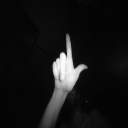

--------------------------------- 2 




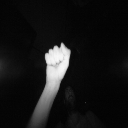

--------------------------------- 3 




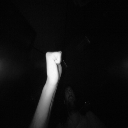

--------------------------------- 4 




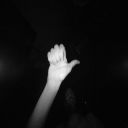

--------------------------------- 5 




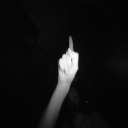

--------------------------------- 6 




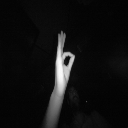

--------------------------------- 7 




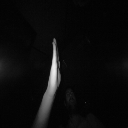

--------------------------------- 8 




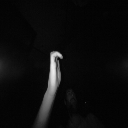

--------------------------------- 9 




In [36]:
for i in range(10):
  for j in range(X.shape[0]):
    if y[j]==i:
      cv2_imshow(X[j])
      k=y[j]
      print("---------------------------------",k,"\n\n")
      break
    else:
      continue


In [37]:
# Make the test train split
threshold = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = threshold, random_state = 42)
print(X_train.shape)
print(y_train.shape)

(14000, 128, 128, 1)
(14000,)


In [0]:
# Create a CNN Sequential Model
model = Sequential()
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)      

In [0]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2,validation_data=(X_test, y_test))

Train on 14000 samples, validate on 6000 samples
Epoch 1/5
 - 5s - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.0183 - val_accuracy: 0.9965
Epoch 2/5
 - 5s - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0181 - val_accuracy: 0.9978
Epoch 3/5
 - 5s - loss: 0.0154 - accuracy: 0.9957 - val_loss: 0.0053 - val_accuracy: 0.9990
Epoch 4/5
 - 5s - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.0066 - val_accuracy: 0.9987
Epoch 5/5
 - 5s - loss: 0.0126 - accuracy: 0.9966 - val_loss: 0.0039 - val_accuracy: 0.9993


In [43]:
#calculate loss and accuracy on test data

tLoss, tAccuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(tAccuracy*100))

6000/6000 [==============================] - 1s 171us/step
Test accuracy: 99.93%


In [0]:
y_pred=np.argmax(model.predict(X_test),axis=1) # Make predictions towards the test set

In [45]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["0","1","2","3","4","5","6","7","8","9"],
             index=["0","1","2","3","4","5","6","7","8","9"])

,0,1,2,3,4,5,6,7,8,9
0,618,0,0,0,0,0,0,0,0,0
1,0,611,0,0,0,0,0,0,0,0
2,0,0,596,0,0,0,0,0,0,0
3,0,0,0,600,0,0,0,0,0,0
4,0,0,0,0,605,0,0,0,0,0
5,0,0,0,3,0,618,0,0,0,0
6,0,0,0,0,0,0,586,0,0,0
7,0,0,0,0,0,0,0,568,0,0
8,0,0,0,0,0,0,0,0,591,0
9,0,0,0,0,0,0,0,0,1,603


#MODEL-2 FINE TUNINNG VGG-16#

In [47]:
#### Creating Training Set and Labels ####
# X for image data
X = []
# y for the labels
y = []


#Load the images into X by doing the necessary conversions and resizing of images
#Resizing is done to reduce the size of image to increase the speed of training
for i in range(len(imagepaths)):
    path=imagepaths[i]
    img = cv2.imread(path)
    img = cv2.resize(img, (224,224))
    X.append(img)  
    #Getting the labels from the image path
    y_lab=int(imagepaths[i][40:42])
    y.append(y_lab)

for i in range(len(imagepaths)):
  if y[i]==10:
    y[i]=0
#Turning X & y into numpy arrays
X = np.array(X)
X = X.reshape(len(X), 224,224,3)
y = np.array(y)

print(X.shape)
print(y.shape)


(20000, 224, 224, 3)
(20000,)


In [49]:
# Make the test train split
threshold = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = threshold, random_state = 42)
print(X_train.shape)
print(y_train.shape)

(14000, 224, 224, 3)
(14000,)


In [50]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 4s 0us/step


In [51]:
vgg16_model.summary()
print(len(vgg16_model.layers))

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [52]:
model = tf.keras.Sequential()
l=len(vgg16_model.layers)-1
for i in range(l):
    layer=vgg16_model.layers[i]
    model.add(layer)
for layer in model.layers:
    layer.trainable = False
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [0]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2,validation_data=(X_test, y_test))

Epoch 1/5
219/219 - 46s - loss: 0.1186 - accuracy: 0.9687 - val_loss: 0.0101 - val_accuracy: 0.9993
Epoch 2/5
219/219 - 45s - loss: 0.0067 - accuracy: 0.9996 - val_loss: 0.0041 - val_accuracy: 0.9997
Epoch 3/5
219/219 - 45s - loss: 0.0032 - accuracy: 0.9998 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/5
219/219 - 45s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9998
Epoch 5/5
219/219 - 45s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000


In [55]:
#calculate loss and accuracy on test data

tLoss, tAccuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(tAccuracy*100))

188/188 [==============================] - 15s 78ms/step - loss: 0.0012 - accuracy: 1.0000
Test accuracy: 100.00%


In [0]:
y_pred=np.argmax(model.predict(X_test),axis=1) # Make predictions towards the test set

In [57]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["0","1","2","3","4","5","6","7","8","9"],
             index=["0","1","2","3","4","5","6","7","8","9"])

,0,1,2,3,4,5,6,7,8,9
0,618,0,0,0,0,0,0,0,0,0
1,0,611,0,0,0,0,0,0,0,0
2,0,0,596,0,0,0,0,0,0,0
3,0,0,0,600,0,0,0,0,0,0
4,0,0,0,0,605,0,0,0,0,0
5,0,0,0,0,0,621,0,0,0,0
6,0,0,0,0,0,0,586,0,0,0
7,0,0,0,0,0,0,0,568,0,0
8,0,0,0,0,0,0,0,0,591,0
9,0,0,0,0,0,0,0,0,0,604
